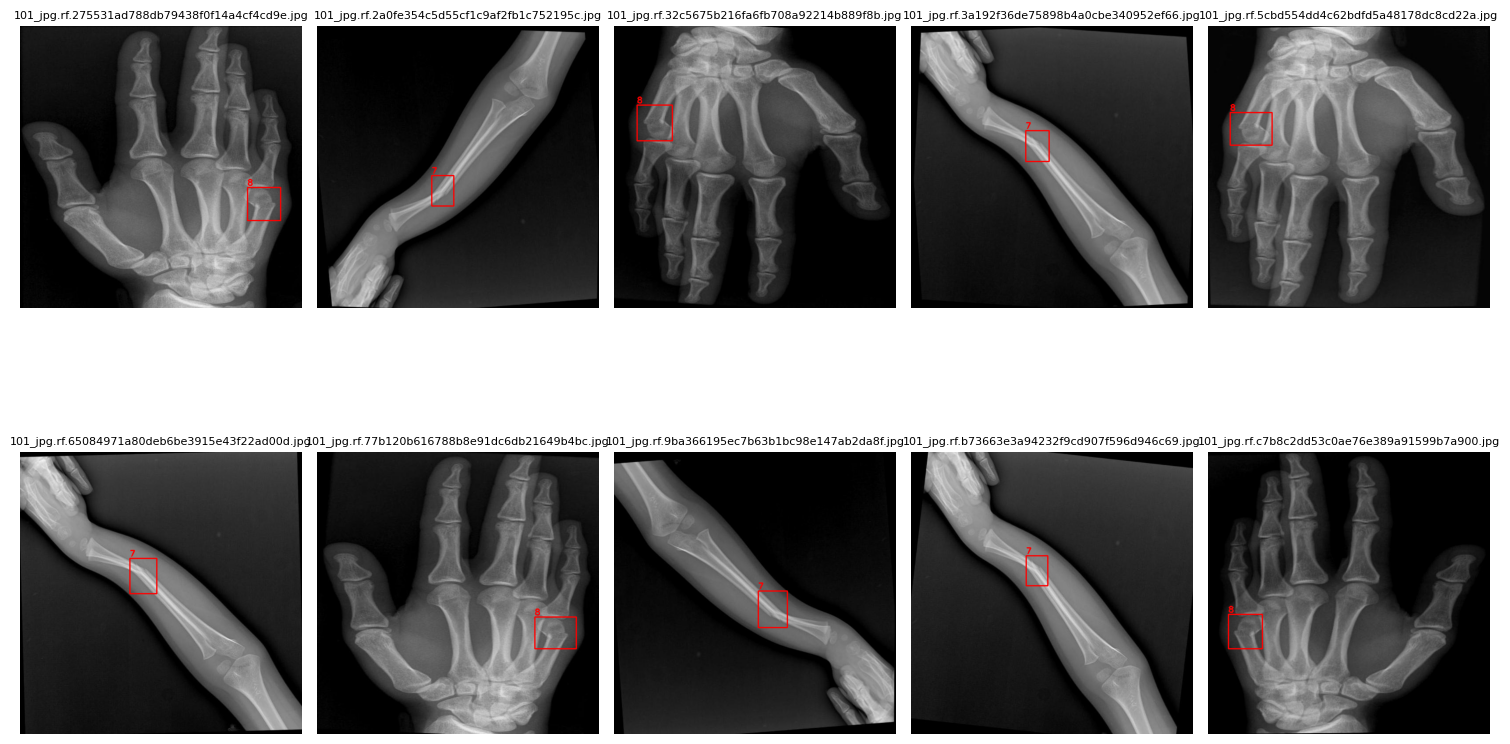

In [1]:
import os
import matplotlib.pyplot as plt
import cv2

# Paths
image_dir = "/kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/train/images"
label_dir = "/kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/train/labels"

# Get first 10 image filenames
files = sorted(os.listdir(image_dir))[:10]

# Plot images
plt.figure(figsize=(15, 10))
for i, file in enumerate(files):
    img_path = os.path.join(image_dir, file)
    label_path = os.path.join(label_dir, file.replace(".jpg", ".txt").replace(".png", ".txt"))
    
    # Load image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape
    
    # Draw YOLO bounding boxes if label exists
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f.readlines():
                cls, x_center, y_center, bw, bh = map(float, line.strip().split())
                
                # Convert YOLO to pixel coordinates
                x1 = int((x_center - bw/2) * w)
                y1 = int((y_center - bh/2) * h)
                x2 = int((x_center + bw/2) * w)
                y2 = int((y_center + bh/2) * h)
                
                # Draw rectangle & label
                cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.putText(img, str(int(cls)), (x1, y1-5), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)
    
    # Show subplot
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(file, fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [4]:
!pip install -q ultralytics

In [19]:
from ultralytics import YOLO
model = YOLO('yolo12s.pt')

In [22]:
model.train(
    data="/kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/data.yaml",
    epochs=100,
    imgsz=768,        # lower resolution
    batch=16,         # smaller batch per GPU
    device="0,1",
    half=True,        # use FP16 to save memory
    augment=True,
    hsv_h=0.0,
    hsv_s=0.0,
    hsv_v=0.1,
    degrees=5,
    scale=0.2,
    translate=0.05,
    shear=1,
    cache="disk",     # avoid RAM cache
    mosaic=0.0,
    mixup=0.0,
    copy_paste=0.0
)


Ultralytics 8.3.199 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=disk, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/data.yaml, degrees=5, deterministic=True, device=0,1, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=True, hsv_h=0.0, hsv_s=0.0, hsv_v=0.1, imgsz=768, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12s.pt, mo

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        128        157      0.907      0.876      0.921      0.454
            Comminuted         15         15      0.919      0.758      0.802      0.337
            Greenstick         10         10      0.833        0.6      0.604      0.262
               Healthy          7          7          1      0.776      0.995      0.705
                Linear          1          1      0.901          1      0.995      0.398
     Oblique Displaced         30         30      0.936      0.968      0.993      0.399
               Oblique          7          7          1      0.841      0.964      0.585
             Segmental          3          3      0.805          1      0.995       0.55
                Spiral          5          5      0.798          1      0.995      0.468
  Transverse Displaced         53         65      0.883      0.815      0.875      0.359
            Transverse         11         14      0.996          1      0.995      0.481
Speed: 0.3ms preproce

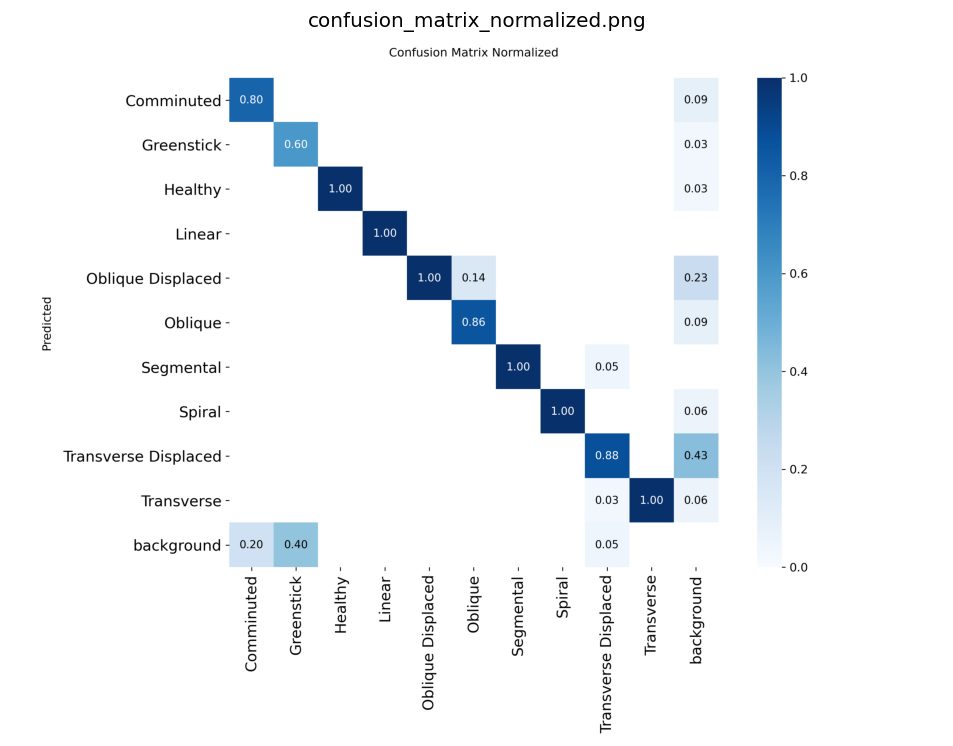

[HATA] Dosya bulunamadı: /kaggle/working/runs/detect/train4/F1_curve.png
[HATA] Dosya bulunamadı: /kaggle/working/runs/detect/train4/P_curve.png
[HATA] Dosya bulunamadı: /kaggle/working/runs/detect/train4/R_curve.png
[HATA] Dosya bulunamadı: /kaggle/working/runs/detect/train4/PR_curve.png


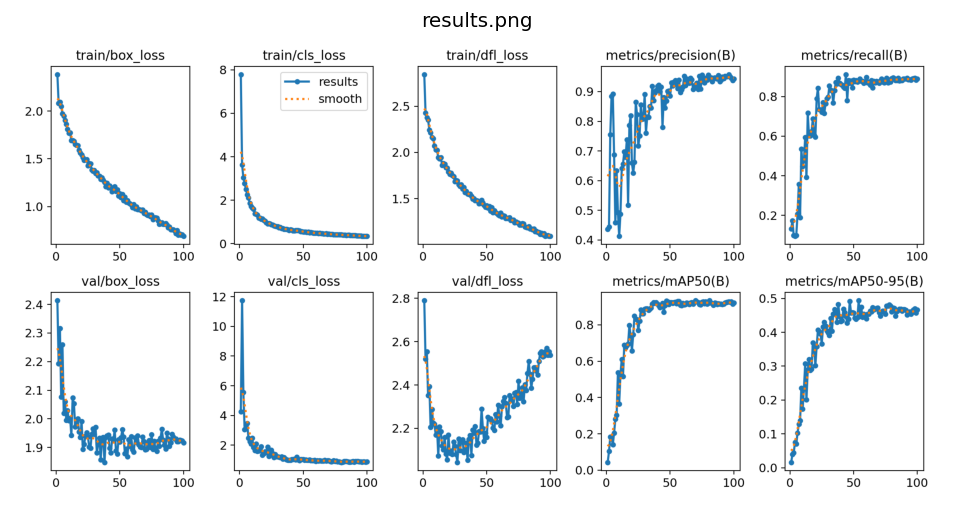

In [24]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):
    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)

        if not os.path.exists(image_path):
            print(f"[HATA] Dosya bulunamadı: {image_path}")
            continue

        img = cv2.imread(image_path)
        if img is None:
            print(f"[HATA] Görüntü okunamadı: {image_path}")
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.title(image_file)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = '/kaggle/working/runs/detect/train4'

# Display the images
display_images(post_training_files_path, image_files)

In [25]:
# === Paths ===
VAL_IMAGE_DIR = "/kaggle/input/human-bone-fractures-image-dataset/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/valid/images"
MODEL_PATH    = "/kaggle/working/runs/detect/train/weights/best.pt"  # or wherever your model is

# === Load trained model ===
model = YOLO(MODEL_PATH)

In [26]:
# === Collect validation images ===
val_images = [os.path.join(VAL_IMAGE_DIR, f)
              for f in os.listdir(VAL_IMAGE_DIR)
              if f.lower().endswith((".png", ".jpg", ".jpeg"))]

In [30]:
import random
# === Sample  random images ===
sampled = random.sample(val_images, min(30, len(val_images)))

In [31]:
# === Run inference ===
results = model(sampled)


0: 1024x1024 1 Comminuted, 17.7ms
1: 1024x1024 1 Healthy, 17.7ms
2: 1024x1024 1 Comminuted, 17.7ms
3: 1024x1024 1 Oblique Displaced, 17.7ms
4: 1024x1024 (no detections), 17.7ms
5: 1024x1024 (no detections), 17.7ms
6: 1024x1024 1 Comminuted, 17.7ms
7: 1024x1024 1 Oblique Displaced, 17.7ms
8: 1024x1024 1 Transverse Displaced, 17.7ms
9: 1024x1024 1 Oblique, 1 Spiral, 17.7ms
10: 1024x1024 1 Oblique Displaced, 17.7ms
11: 1024x1024 1 Oblique Displaced, 1 Transverse Displaced, 17.7ms
12: 1024x1024 1 Healthy, 1 Transverse Displaced, 1 Transverse, 17.7ms
13: 1024x1024 1 Greenstick, 17.7ms
14: 1024x1024 1 Transverse Displaced, 17.7ms
15: 1024x1024 2 Healthys, 17.7ms
16: 1024x1024 1 Oblique Displaced, 17.7ms
17: 1024x1024 1 Transverse, 17.7ms
18: 1024x1024 1 Healthy, 17.7ms
19: 1024x1024 1 Transverse, 17.7ms
20: 1024x1024 1 Healthy, 17.7ms
21: 1024x1024 2 Transverse Displaceds, 17.7ms
22: 1024x1024 1 Oblique Displaced, 17.7ms
23: 1024x1024 1 Transverse Displaced, 17.7ms
24: 1024x1024 1 Oblique D

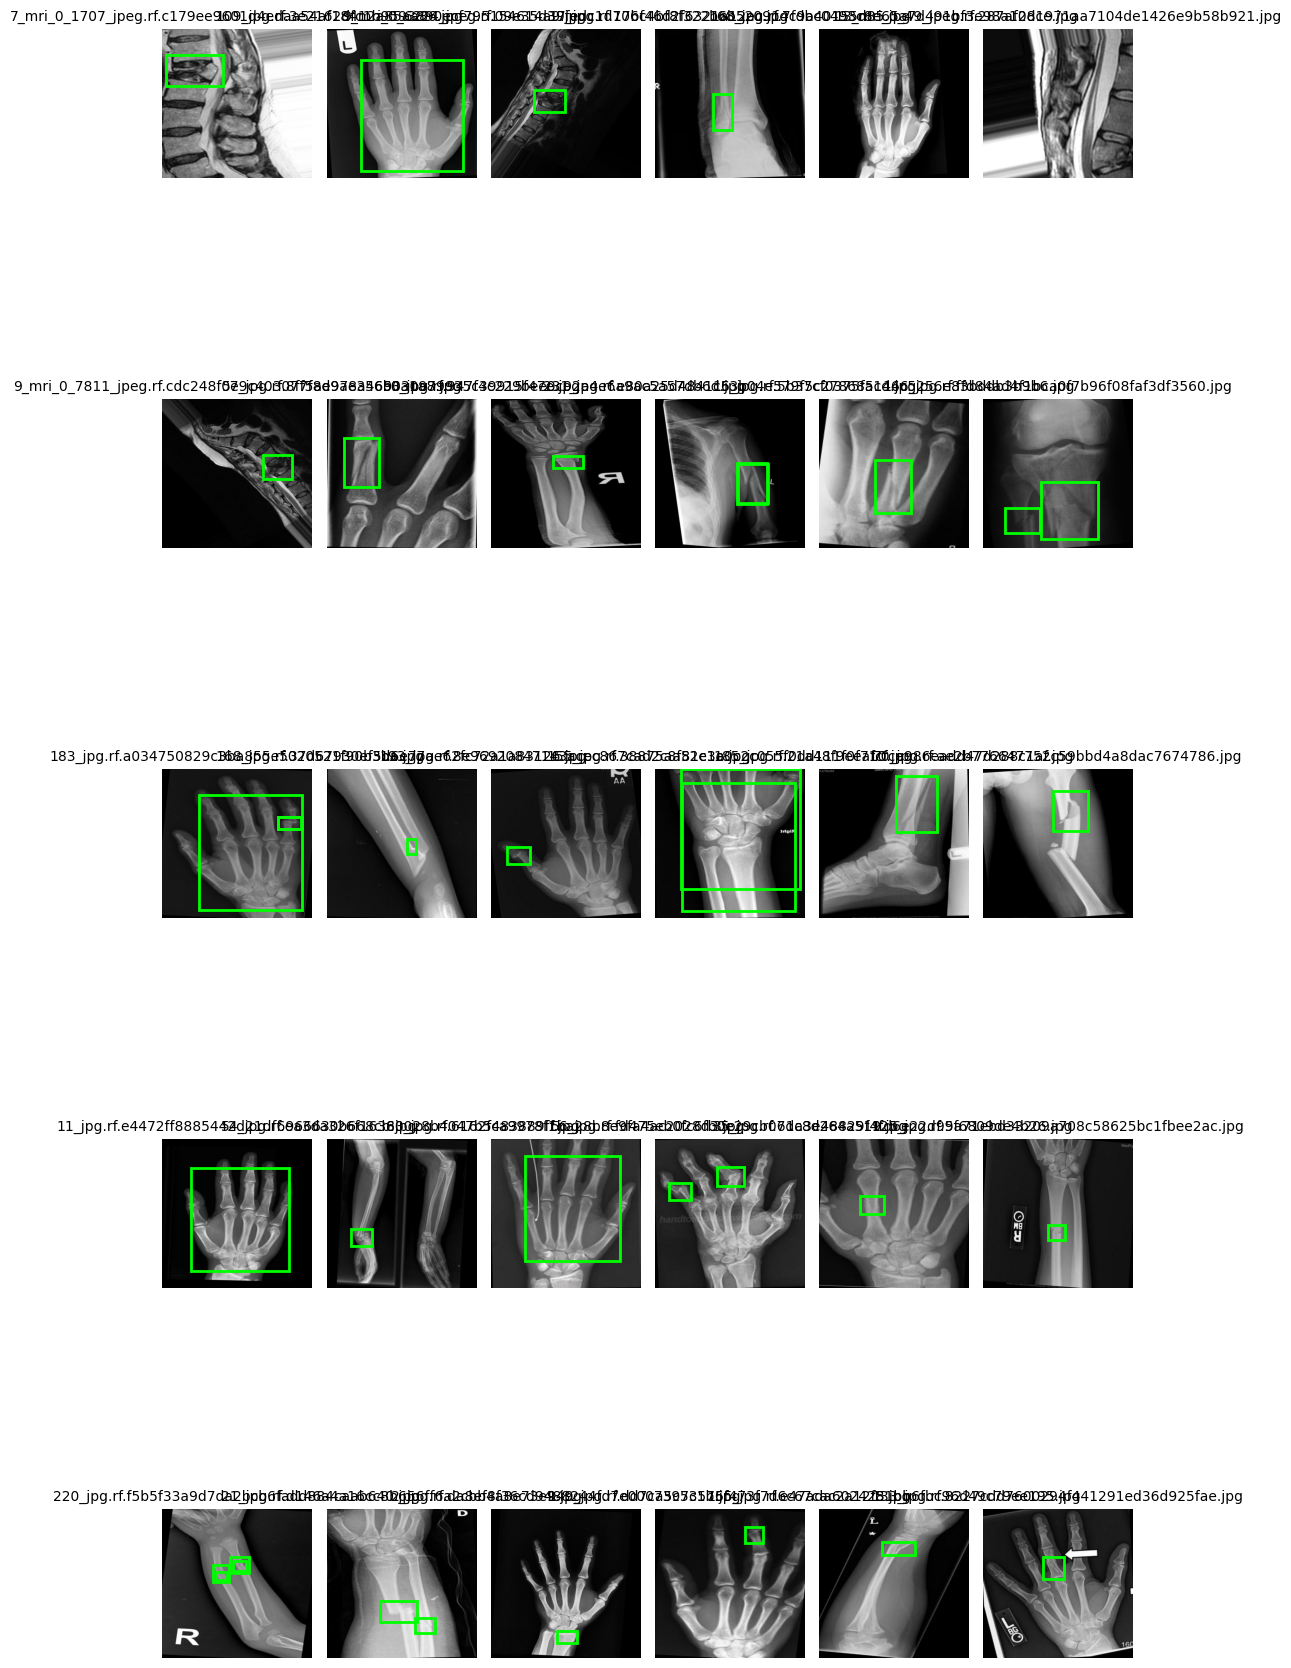

In [32]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
# === Plotting (6 rows × 4 columns) ===
fig, axes = plt.subplots(5, 6, figsize=(10, 20))
axes = axes.flatten()

for ax, result in zip(axes, results):
    img = result.orig_img  # NumPy image
    boxes = result.boxes

    ax.imshow(img, cmap="gray" if len(img.shape) == 2 or img.shape[2] == 1 else None)

    if boxes is not None and boxes.xyxy is not None:
        for box in boxes.xyxy.cpu().numpy():
            x1, y1, x2, y2 = box[:4]
            rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                     linewidth=2, edgecolor="lime", facecolor="none")
            ax.add_patch(rect)

    ax.set_title(os.path.basename(result.path), fontsize=10)
    ax.axis("off")

plt.tight_layout()
plt.show()